In [42]:
import keras
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [43]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
print(f"number of training examples : {x_train.shape[0]}")
print(f"number of testing examples : {x_test.shape[0]}")

number of training examples : 25000
number of testing examples : 25000


In [44]:
# Encoding the integer sequences in a binary matrix
def vectorizeSequences(sequences, dimensions = 10000):
    res = np.zeros((len(sequences), dimensions))
    for i, j in enumerate(sequences):
        res[i, j] = 1.    
    return res 
x_train = vectorizeSequences(x_train)
x_test = vectorizeSequences(x_test)
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [68]:
# Separating Cross Validation Set and Training Set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [69]:
history = model.fit(partial_x_train, partial_y_train, epochs = 4, batch_size=512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 117us/step - loss: 0.5185 - acc: 0.7700 - val_loss: 0.3898 - val_acc: 0.8519
Epoch 2/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.2952 - acc: 0.9025 - val_loss: 0.3012 - val_acc: 0.8846
Epoch 3/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.2094 - acc: 0.9293 - val_loss: 0.2810 - val_acc: 0.8889
Epoch 4/4
15000/15000 [==============================] - 2s 129us/step - loss: 0.1586 - acc: 0.9478 - val_loss: 0.2820 - val_acc: 0.8872


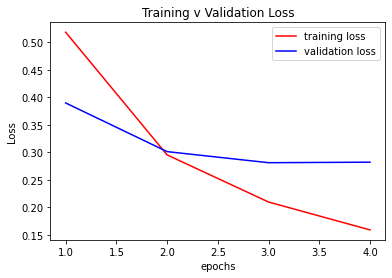

In [70]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1,5)

plt.plot(epochs, loss_values, "r", label = "training loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("Training v Validation Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

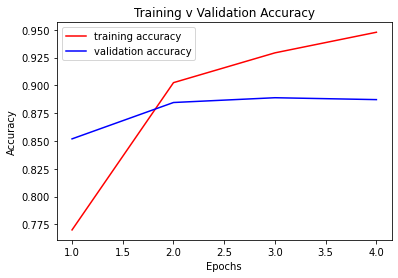

In [73]:
history_dict = history.history
loss_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
epochs = range(1,5)

plt.plot(epochs, loss_acc, "r", label = "training accuracy")
plt.plot(epochs, val_acc, "b", label = "validation accuracy")
plt.title("Training v Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
test_loss, model_accuracy = model.evaluate(x_test, y_test)
print(f"Model Accuracy is {round(model_accuracy*100,2)}%")

25000/25000 [==============================] - 2s 89us/step
Model Accuracy is 88.02%


# Author : Sammya Majumdar